# Processed Data Analysis: Tertiary Education Attainment by Country
### **DONT FORGET TO FILL THIS PART IN!!!**
This notebook ...

## Step 1: Import Libraries & Load Clean Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
df = pd.read_csv("../data/tertiary_clean.csv")

## Step 2: Overall Trends in Tertiary Education

In [6]:
# function calc_avg(df, metric, avg_type)
# - df = dataframe
# - metric = lh or lhc
# - avg_type = mean, median, or weighted_mean
def calc_avg(df, metric, avg_type):
    # group by year
    grouped = df.groupby("year")
    # calculate avg_type of metric
    if avg_type == "mean":
        result = grouped[metric].mean()
    elif avg_type == "median":
        result = grouped[metric].median()
    elif avg_type == "weighted_mean":
        result = grouped.apply(lambda x: np.average(x[metric], weights=x["pop"]), include_groups=False)
    else: # give error if avg_type is not supported
        raise ValueError("avg_type must be 'mean', 'median', or 'weighted_mean'")
    # return clean result
    return result.reset_index(name=metric)

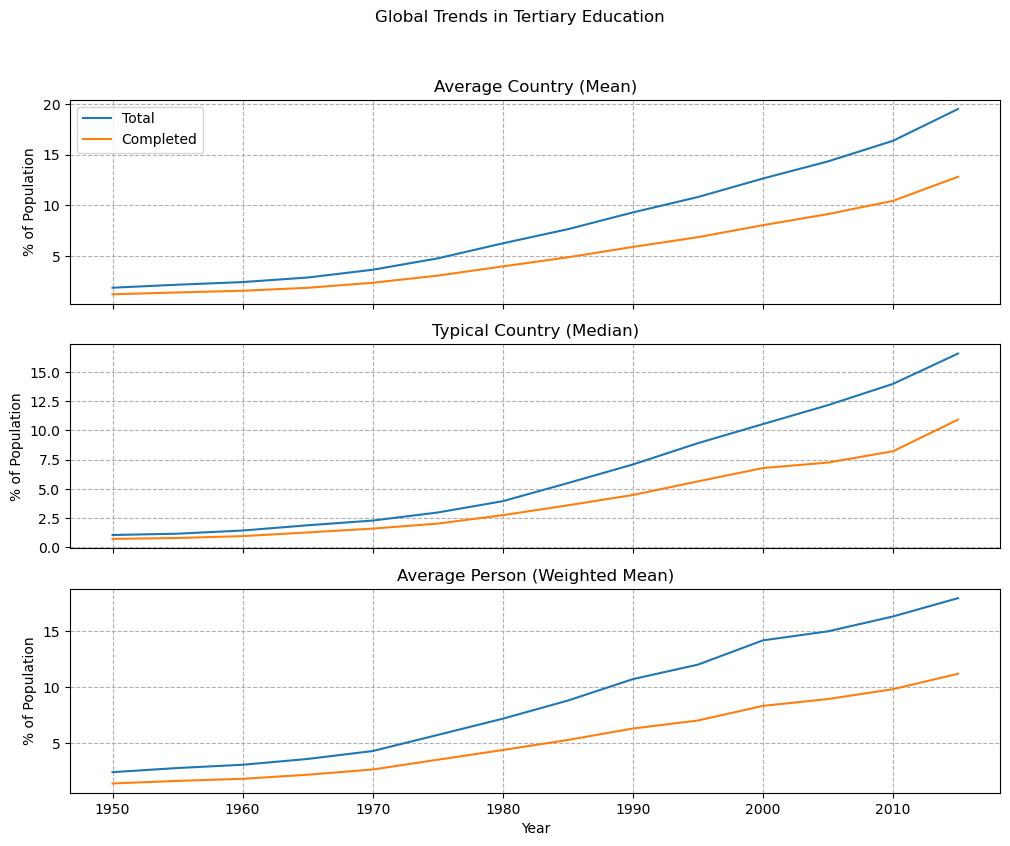

In [7]:
# compute average values
mean_lh = calc_avg(df, "lh", "mean")
mean_lhc = calc_avg(df, "lhc", "mean")
median_lh = calc_avg(df, "lh", "median")
median_lhc = calc_avg(df, "lhc", "median")
wmean_lh = calc_avg(df, "lh", "weighted_mean")
wmean_lhc = calc_avg(df, "lhc", "weighted_mean")

# prepare plot
fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=True)

# plot mean
axes[0].plot(mean_lh["year"], mean_lh["lh"], label="Total")
axes[0].plot(mean_lhc["year"], mean_lhc["lhc"], label="Completed")
axes[0].set_title("Average Country (Mean)")
axes[0].set_ylabel("% of Population")
axes[0].legend()
axes[0].grid(linestyle="--")
# plot median
axes[1].plot(median_lh["year"], median_lh["lh"])
axes[1].plot(median_lhc["year"], median_lhc["lhc"])
axes[1].set_title("Typical Country (Median)")
axes[1].set_ylabel("% of Population")
axes[1].grid(linestyle="--")
# plot weighted mean
axes[2].plot(wmean_lh["year"], wmean_lh["lh"], label="Total")
axes[2].plot(wmean_lhc["year"], wmean_lhc["lhc"], label="Completed")
axes[2].set_title("Average Person (Weighted Mean)")
axes[2].set_ylabel("% of Population")
axes[2].grid(linestyle="--")

# plot details
plt.xlabel("Year")
fig.suptitle("Global Trends in Tertiary Education")
plt.show()

### **ANALYSIS**
<u>Population with Tertiary Education for Average Country (Mean)</u>

Observations:
- Steady growth in both total and completed tertiary education rates.
- The total percentage rose from around 2% to nearly 20% from 1950 to 2015.
- The completed percentage rose more slowly, so the gap between those who have attended and those who have completed tertiary education has widened slightly over time.

Implications:
- On average, countries globally have improved their higher education access.
- Completion rates are also rising, but not as quickly as attendance.
- The growing gap suggests that many students start tertiary education but do not finish.

<u>Population with Tertiary Education for Typical Country (Median)</u>

Observations:
- Lower overall percentages than the mean, indicating many countries are below the average.
- There is a sharper rise in education rates since the 1980s.
- Despite the initial values in 1950 starting lower than in the mean graph, the final values in 2015 are slightly below those in the mean graph.
- The gap between total and completed tertiary education remains visible and grows over time, similar to the first graph.

Implications:
- Some countries are high-performing and drive up the average.
- The typical country had slower start and lower initial growth in tertiary education than the mean suggests.
- Despite the late start, the typical country shows strong growth after 1980, approaching the levels seen in the mean.
- As seen previously, while the access to tertiary education has expanded, many people still do not complete it.

<u>Population with Tertiary Education for Average Person (Weighted Mean)</u>

Observations:
- Values are closer to the mean than to the median, but slightly lower than the mean.
- The gap between total and completed tertiary education remains wide (about 6-7 percentage points), which closely matches the mean panel and is larger the in the median panel (about 4 percentage points).
- From the mid-90s onwards, the blue line (total) almost overlaps the mean panel's blue line, whereas the orange line (completed) stays below the mean panel's orange line.
- By 2015, roughly 18% of the global population had accessed tertiary education, with about 11% completing it.

Implications:
- Access to tertiary education for the average person has caught up to the average country level, confirming that higher education is reaching a large portion of humanity, not just a large number of countries.
- Degree completion has not kept pace with degree access: there seems to be a difficulty converting enrolment into graduation.
- Tertiary education access and completion remain limited in absolute terms, with fewer than 1 in 5 people globally attending, and just over 1 in 10 completing, by 2015.

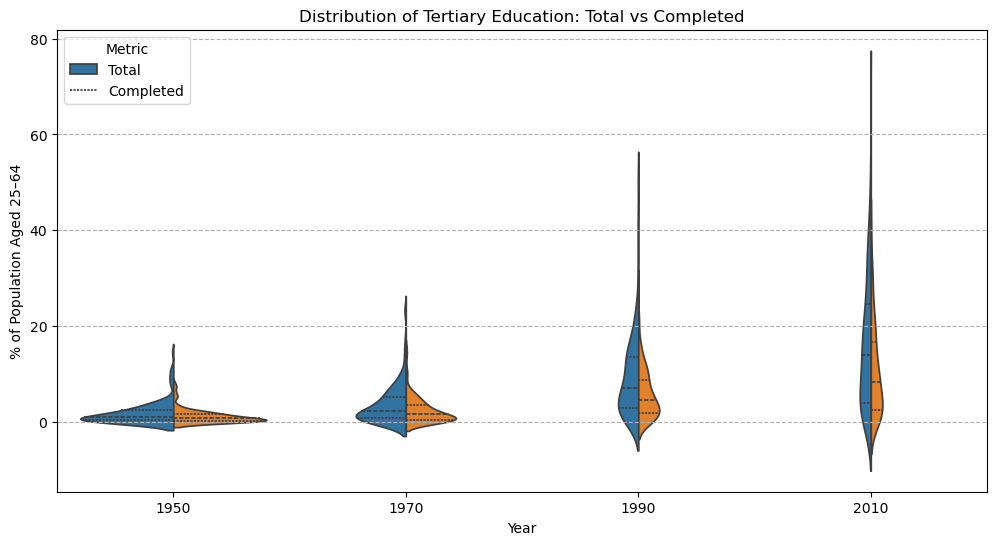

In [9]:
# filter milestone years only (less clutter)
milestone_years = [1950, 1970, 1990, 2010]
df_sample = df[df["year"].isin(milestone_years)]

# reshape to long format (necessary for side-by-side violin plots)
df_long = pd.melt(df_sample,
                  id_vars=["country", "year"],
                  value_vars=["lh", "lhc"],
                  var_name="metric",
                  value_name="value")

# plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_long, x="year", y="value", hue="metric", split=True, inner="quart")
plt.title("Distribution of Tertiary Education: Total vs Completed")
plt.ylabel("% of Population Aged 25–64")
plt.xlabel("Year")
plt.legend(title="Metric", labels=["Total", "Completed"])
plt.grid(axis="y", linestyle="--")
plt.show()

### **ANALYSIS**
Observations:
- Clear growth over time in both total and completed tertiary education (as discussed previously).
- Distribution expanding over the years: at first distributions are relatively low and tight, but increase largely, with some countries acheiving or exceeding 60% population with total tertiary education.
- The gap between total and completed tertiary education increases over time (as discussed previously).
- The median and quartiles gradually increase over time, with the distributions increasingly skewing right (many countries have low attainment, but a few have very high levels, pulling the upper tail upward). 

Implications:
- Higher tertiary education attainment over time.
- Increasing educational inequality or divergence between countries.
- Persistent challenges in completion rates.
- Large and growing disparities between countries, with a few countries achieving very high levels of population percentage with total and completed tertiary education.

## Step 3: Year-over-Year Change

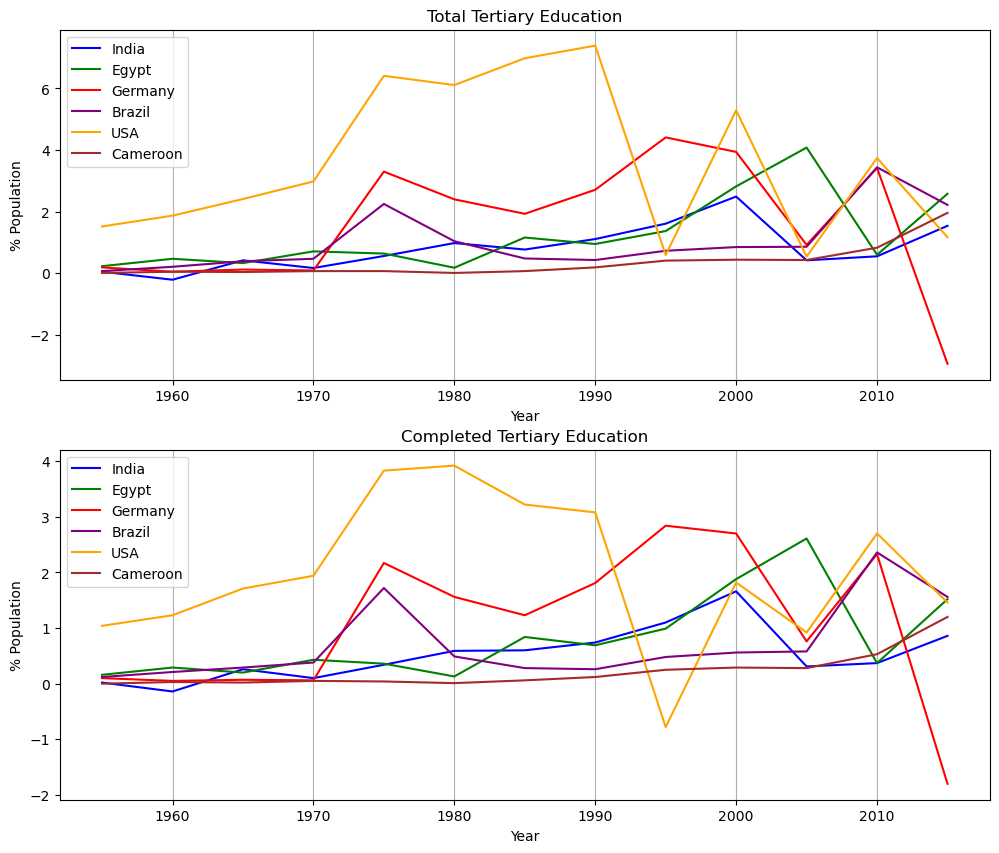

In [60]:
## calculations
## prep df sort by country & year
df_sorted = df.sort_values(by=["country", "year"])

## calculate annual change in tertiary education share
df_sorted["lh_change"] = df_sorted.groupby("country")["lh"].diff()
df_sorted["lhc_change"] = df_sorted.groupby("country")["lhc"].diff()

## select 6 countries
countries = df_sorted["country"].unique()
# countries = ["Republic of Korea", "Germany", "Iran (Islamic Republic of)", "Chile", "South Africa", "India"]
countries = ["India", "Egypt", "Germany", "Brazil", "USA", "Cameroon"]

# OPTIONAL: select 6 random countries. fun for exploration!
# countries = random.sample(list(countries), 6)

## assign colors to countries
base_colors = ["blue", "green", "red", "purple", "orange", "brown"]
color_map = dict(zip(countries, base_colors))

# plot
## prep figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

## total tertiary education: lh_change
### loop through countries to plot
for country in countries:
    c_plot = df_sorted[df_sorted["country"] == country]
    ax1.plot(c_plot["year"], c_plot["lh_change"], label = country, color = color_map[country])

### plot lh_change over time
ax1.legend()
ax1.grid(axis="x")
ax1.set_title("Total Tertiary Education")
ax1.set_xlabel("Year")
ax1.set_ylabel("% Population")

## completed tertiary education: lhc_change
### loop through countries to plot
for country in countries:
    c_plot = df_sorted[df_sorted["country"] == country]
    ax2.plot(c_plot["year"], c_plot["lhc_change"], label = country, color = color_map[country])

### plot lhc_change over time
ax2.legend()
ax2.grid(axis="x")
ax2.set_title("Completed Tertiary Education")
ax2.set_xlabel("Year")
ax2.set_ylabel("% Population")

# show plot
plt.show()

### **ANALYSIS**
The USA dominates in expansion into tertiary education from the 1960s to 1990, with a total tertiary education of up to almost 8% of the population. Completed tertiary education follows a similar patter, peaking at about 4% of the population, but after 1990 both metrics fall into an unstable pattern.

Germany follows a similar trajectory to the USA, with a surge in the 1970s and steady growth until around 2000, after which both metrics show an unstable pattern (and a large decline in 2015, possibly due to data revisions).

Brazil sees a significant rise in both metrics in the mid-1970s, although this soon plateaus at about 1%, with a large increase mid-2000s.

India fluctuates around zero, until a slow but steady growth is observed from 1970 to 2000. Then, this pattern seem to be repeated: there is a drop to around zero, followed by slow and steady growth.

Egypt follows a similar but more dramatic path: flat around zero until 1980, followed by larger growth than India until about 2005 (peaks at around 4% of total population with tertiary education), where there is a sudden drop to zero and a sharp uptick to around 2% in 2015.

On the other hand, Cameroon shows little to no growth, hovering around zero until mid-2000s, where there is a small growth which reached up to around 1% of total population with tertiary education in 2015.

For all of these countries the completed tertiary education follows a similar trend to the total tertiary education, albeit at a lower level.

## Step 4: Regional Comparisons 

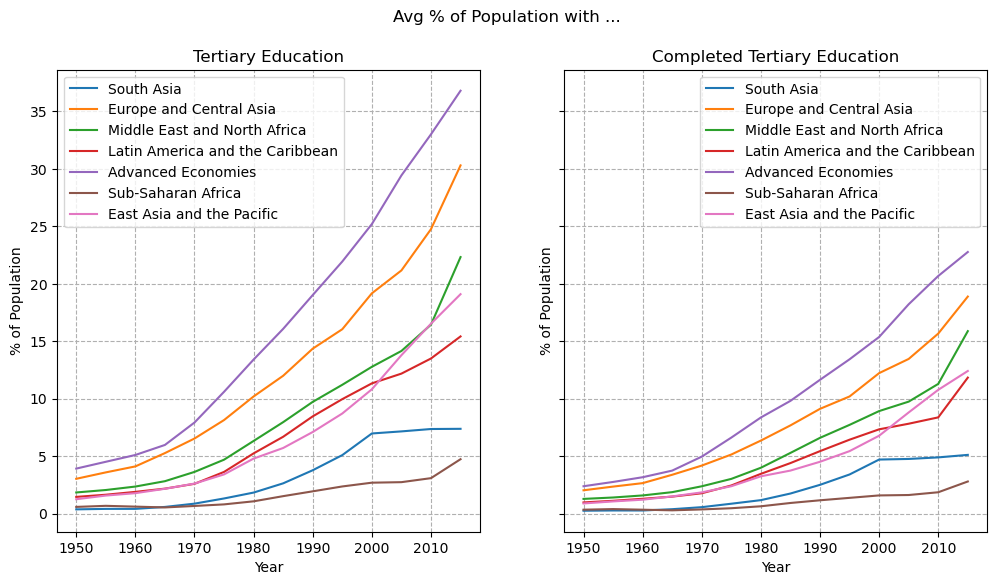

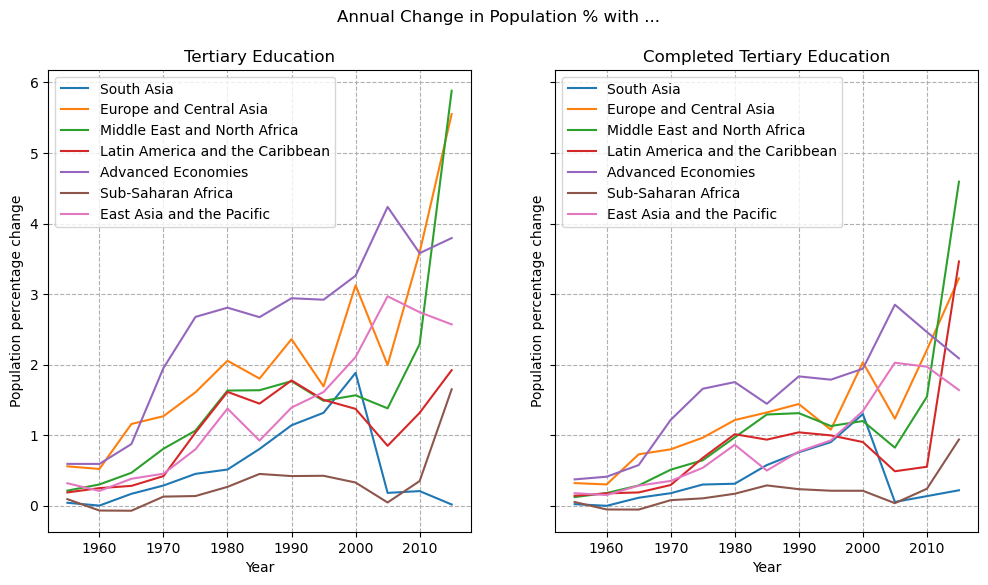

In [34]:
# define regions
regions = df_sorted["region_code"].unique()

# prep variable for calculating averages
avg_type = "mean"  # can also use "weighted_mean" or "median"
region_lh_avg_list = []
region_lhc_avg_list = []

# loop through regions to calculate average of each using the calc_avg function
for region in regions:
    region_df = df_sorted[df_sorted["region_code"] == region]
    
    avg_lh = calc_avg(region_df, "lh", avg_type)
    avg_lh["region_code"] = region
    region_lh_avg_list.append(avg_lh)

    avg_lhc = calc_avg(region_df, "lhc", avg_type)
    avg_lhc["region_code"] = region
    region_lhc_avg_list.append(avg_lhc)

# turn into dataframes and sort by region and year
df_region_lh = pd.concat(region_lh_avg_list).sort_values(by=["region_code", "year"])
df_region_lhc = pd.concat(region_lhc_avg_list).sort_values(by=["region_code", "year"])

# compute annual changes
df_region_lh["lh_change"] = df_region_lh.groupby("region_code")["lh"].diff()
df_region_lhc["lhc_change"] = df_region_lhc.groupby("region_code")["lhc"].diff()

# prepare figure for lh & lhc
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot avg lh
for region in regions:
    plot_df = df_region_lh[df_region_lh["region_code"] == region]
    axs[0].plot(plot_df["year"], plot_df["lh"], label=region)
axs[0].set_title("Tertiary Education")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("% of Population")
axs[0].legend()
axs[0].grid(linestyle="--")

# Plot avg lhc
for region in regions:
    plot_df = df_region_lhc[df_region_lhc["region_code"] == region]
    axs[1].plot(plot_df["year"], plot_df["lhc"], label=region)
axs[1].set_title("Completed Tertiary Education")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("% of Population")
axs[1].legend()
axs[1].grid(linestyle="--")

# plot
plt.suptitle("Avg % of Population with ...")
plt.show()

# prepare figure for lh & lhc change
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot lh change
for region in regions:
    plot_df = df_region_lh[df_region_lh["region_code"] == region]
    axs[0].plot(plot_df["year"], plot_df["lh_change"], label=region)
axs[0].set_title("Tertiary Education")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Population percentage change")
axs[0].legend()
axs[0].grid(linestyle="--")

# Plot lhc change
for region in regions:
    plot_df = df_region_lhc[df_region_lhc["region_code"] == region]
    axs[1].plot(plot_df["year"], plot_df["lhc_change"], label=region)
axs[1].set_title("Completed Tertiary Education")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Population percentage change")
axs[1].legend()
axs[1].grid(linestyle="--")

# plot
plt.suptitle("Annual Change in Population % with ...")
plt.show()

### **ANALYSIS**
<u>Top Graphs: Average % of Population with (Completed) Tertiary Education</u>

Observations:
- _Advanced Economies_ consistently lead in both tertiary and completed tertiary education, reaching above 35% and 25% by 2015.
- _Europe and Central Asia_ show strong growth, especially post-1980, ending close behind _Advanced Economies_.
- _Middle East and North Africa_ display large increases post-2000, reaching about 22% for total tertiary education.
- _East Asia and the Pacific_ and _Latin America and the Caribbean_ follow a steady upward trend, peaking at about 19% and 15% respectively.
- _South Asia_ shows modest growth with a visible jump around 2000 that plateaus afterward, staying at about 7% for total tertiary education and 5% for completed tertiary education.
- _Sub-Saharan Africa_ remains the lowest across both categories, with only about 5% total tertiary education and about 3% completed tertiary education.

Implications:
- Persistent educational gaps exist between global regions, especially between Advanced Economies and Sub-Saharan Africa.
- Completion gaps (about 3–5 percentage points across all regions) suggest that access to tertiary education does not guarantee successful completion.
- Late accelerations in some regions (_Middle East and North Africa_, _East Asia and the Pacific_, _Latin America and the Caribbean_) may signal expanding access or shifting policies in recent decades.
- While all regions improved, absolute disparities remain significant.

<u>Bottom Graphs: Annual Change in Population % with (Completed) Tertiary Education</u>

Observations:
- Most regions show low to moderate annual changes (typically 0–2 percentage points).
- Sharp spikes appear post-2000, particularly for _Middle East and North Africa_ and _Europe and Central Asia_.
- _Advanced Economies_ had early peaks, but plateaued to around 3% after 1980.
- _South Asia_ and _Sub-Saharan Africa_ exhibit low and erratic growth, rarely exceeding 1 percentage point.
- Tertiary education completion rate changes follow similar patterns and are consistently lower than total tertiary education rate changes.

Implications:
- The post-2000 increase in some regions (_Middle East and North Africa_ and _Europe and Central Asia_) likely reflect structural changes, such as expanded access, demographic growth, or policy investment, resulting in surges in educational progress.
- Plateaus in _Advanced Economies_ indicate maturation or saturation.
- Persistent low growth in _South Asia_ and _Sub-Saharan Africa_ suggests barriers which are inhibiting tertiary education (e.g.: economic, infrastructural, institutional).
- The constant gap between total and completed tertiary education growth in all regions demonstrate, once again, inefficiencies in the system.


## Step 5: Top and Bottom Performers

In [18]:
# simply display the countries with the highest, lowest, fastest-growing, and slowest-growing education attainment (basically finding the min/max data points from steps 2 & 3)
# bar chart for ranking? scatter plots with highlighted data points?

### **ANALYSIS**
...

## Step 6: Key Insights and Takeaways

TODO:
- summarise insights from previous steps into KEY insights
- declare data points that stand out and convergence/divergence between countries
- future investigation